# Семинар 1: знакомство с PyTorch 🔥

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

**План семинара**

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F # свертки, функции активации
import torchvision # картинки
from torch import nn # настройка слоев: полносвязный, сверточный
from tqdm.notebook import tqdm # красиво следить за циклом

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [86]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.63293931, 0.8411742 , 0.43718748],
       [0.68050853, 0.66745754, 0.35410485],
       [0.52821886, 0.6992589 , 0.39895697],
       [0.09382723, 0.36240235, 0.95739857],
       [0.95211418, 0.50836021, 0.32498414]])

In [87]:
# размеры массива
a.shape

(5, 3)

In [88]:
# сложение
a + 5

array([[5.63293931, 5.8411742 , 5.43718748],
       [5.68050853, 5.66745754, 5.35410485],
       [5.52821886, 5.6992589 , 5.39895697],
       [5.09382723, 5.36240235, 5.95739857],
       [5.95211418, 5.50836021, 5.32498414]])

In [89]:
# матричное умножение @
a @ a.T

array([[1.2993191 , 1.14697887, 1.09694802, 0.78279312, 1.17232899],
       [1.14697887, 1.03398167, 0.96745566, 0.64475789, 1.10230914],
       [1.09694802, 0.96745566, 0.92714483, 0.68493521, 0.98805476],
       [0.78279312, 0.64475789, 0.68493521, 1.05675103, 0.58470452],
       [1.17232899, 1.10230914, 0.98805476, 0.58470452, 1.27056621]])

In [90]:
# среднее по колонкам (2 оси: строки и стобцы, -1 это последнее измерение, т.е. столбцы)
a.mean(axis=-1)

array([0.63710033, 0.56735697, 0.54214491, 0.47120938, 0.59515284])

In [91]:
# решейп
a.reshape(3, 5) # Матрица не транспонирована, а изменена в пространстве. Т.е. порядок элементов не меняется

array([[0.63293931, 0.8411742 , 0.43718748, 0.68050853, 0.66745754],
       [0.35410485, 0.52821886, 0.6992589 , 0.39895697, 0.09382723],
       [0.36240235, 0.95739857, 0.95211418, 0.50836021, 0.32498414]])

**Разминка**

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [92]:
np.sum(np.arange(1, 10001)**2)

333383335000

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [93]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.8457, 0.9407, 0.3797],
        [0.0726, 0.6726, 0.1496],
        [0.6212, 0.6697, 0.0619],
        [0.8135, 0.1966, 0.5490],
        [0.4835, 0.2626, 0.4336]])

In [94]:
# размеры тензора (псевдоним)
x.shape

torch.Size([5, 3])

In [95]:
# тоже размеры тензора (из pytorch)
x.size()

torch.Size([5, 3])

In [96]:
# сложение
x + 5

tensor([[5.8457, 5.9407, 5.3797],
        [5.0726, 5.6726, 5.1496],
        [5.6212, 5.6697, 5.0619],
        [5.8135, 5.1966, 5.5490],
        [5.4835, 5.2626, 5.4336]])

In [97]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm(поэлементно), torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0)) # или x.matmul(y)

tensor([[1.7443, 0.7509, 1.1788, 1.0814, 0.8205],
        [0.7509, 0.4801, 0.5048, 0.2734, 0.2765],
        [1.1788, 0.5048, 0.8383, 0.6710, 0.5030],
        [1.0814, 0.2734, 0.6710, 1.0019, 0.6830],
        [0.8205, 0.2765, 0.5030, 0.6830, 0.4907]])

In [98]:
# очередное матричное умножение
x.mm(x.t())

tensor([[1.7443, 0.7509, 1.1788, 1.0814, 0.8205],
        [0.7509, 0.4801, 0.5048, 0.2734, 0.2765],
        [1.1788, 0.5048, 0.8383, 0.6710, 0.5030],
        [1.0814, 0.2734, 0.6710, 1.0019, 0.6830],
        [0.8205, 0.2765, 0.5030, 0.6830, 0.4907]])

In [99]:
# поэлементное умножение
x * x

tensor([[0.7152, 0.8849, 0.1442],
        [0.0053, 0.4524, 0.0224],
        [0.3859, 0.4486, 0.0038],
        [0.6618, 0.0387, 0.3014],
        [0.2338, 0.0689, 0.1880]])

In [100]:
x.mul(x)

tensor([[0.7152, 0.8849, 0.1442],
        [0.0053, 0.4524, 0.0224],
        [0.3859, 0.4486, 0.0038],
        [0.6618, 0.0387, 0.3014],
        [0.2338, 0.0689, 0.1880]])

In [101]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.7220, 0.2982, 0.4509, 0.5197, 0.3932])

In [102]:
# решейп
x.view([3, 5]).shape # из pytorch

torch.Size([3, 5])

In [103]:
# или так
x.reshape([3, 5]).shape # псевдоним

torch.Size([3, 5])

In [104]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [105]:
torch.sum(torch.range(1,10000, dtype=torch.int)**2) # либо на всё int

<ipython-input-105-655fa89f99fa>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.sum(torch.range(1,10000, dtype=torch.int)**2) # либо на всё int


tensor(333383335000)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [106]:
# пустой тензор (не инициализированный; с рандомными и никак не заданными числами)
x = torch.empty(5, 3)
x

tensor([[-7.0715e-30,  4.5797e-41,  8.3274e+16],
        [ 3.1819e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.6816e-43,  7.7052e+31,  7.2148e+22],
        [ 1.5766e-19,  1.0256e-08,  1.6802e-04]])

In [107]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.5507, 0.9471, 0.0922],
        [0.9152, 0.7409, 0.3016],
        [0.5968, 0.1774, 0.9072],
        [0.7652, 0.1704, 0.0793],
        [0.4572, 0.2084, 0.0424]])

In [108]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [109]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [110]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [111]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.8797,  0.2538, -0.4914],
        [ 0.7623,  1.2237, -0.2120],
        [-1.0342, -0.6948, -0.7914],
        [-0.5419, -1.4178, -1.5269],
        [ 0.2085,  0.1158, -1.5609]])

In [112]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [113]:
x

tensor([[0.3960, 0.3299, 0.2143],
        [0.8619, 0.6167, 0.6595],
        [0.1664, 0.9277, 0.3313],
        [0.7279, 0.6087, 0.9088],
        [0.2479, 0.7770, 0.2333]])

In [114]:
y

tensor([[0.2008, 0.8047, 0.4357],
        [0.6057, 0.3696, 0.9087],
        [0.7967, 0.8187, 0.0800],
        [0.2429, 0.4781, 0.1032],
        [0.4289, 0.4139, 0.7392]])

In [115]:
# сложение
x + y

tensor([[0.5968, 1.1346, 0.6500],
        [1.4676, 0.9863, 1.5682],
        [0.9631, 1.7464, 0.4113],
        [0.9707, 1.0868, 1.0120],
        [0.6768, 1.1909, 0.9725]])

In [116]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.5968, 1.1346, 0.6500],
        [1.4676, 0.9863, 1.5682],
        [0.9631, 1.7464, 0.4113],
        [0.9707, 1.0868, 1.0120],
        [0.6768, 1.1909, 0.9725]])

In [117]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x) # с перезаписью x
x

tensor([[0.5968, 1.1346, 0.6500],
        [1.4676, 0.9863, 1.5682],
        [0.9631, 1.7464, 0.4113],
        [0.9707, 1.0868, 1.0120],
        [0.6768, 1.1909, 0.9725]])

In [118]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [119]:
x.unsqueeze(0)

tensor([[[0.5968, 1.1346, 0.6500],
         [1.4676, 0.9863, 1.5682],
         [0.9631, 1.7464, 0.4113],
         [0.9707, 1.0868, 1.0120],
         [0.6768, 1.1909, 0.9725]]])

In [120]:
x.squeeze(0) # убрать первое измерение (ничего не писать - убрать все единичные измерения)

tensor([[0.5968, 1.1346, 0.6500],
        [1.4676, 0.9863, 1.5682],
        [0.9631, 1.7464, 0.4113],
        [0.9707, 1.0868, 1.0120],
        [0.6768, 1.1909, 0.9725]])

In [121]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [122]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [123]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [124]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [125]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a) # поэлементное сравнение

True

In [126]:
np.allclose(x.numpy()[:, 1], a[:, 1]) # тоже самое но взяли колонку отдельную

True

In [127]:
torch.from_numpy(x.numpy()) # сначала перевод из torch в numpy, потом из numpy в torch

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [128]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

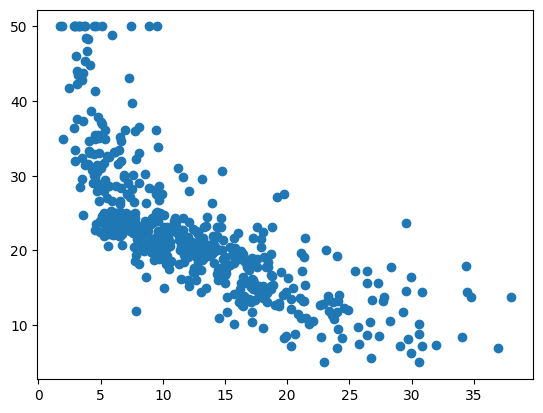

In [129]:
plt.scatter(data[:, -1], target); # точечная диаграмма: x=последний столб в данных, y. Выше процент популяции (больше x) => дешевле дом (меньше y). Хотим построить модель приближения

# будет w * x + b = y

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

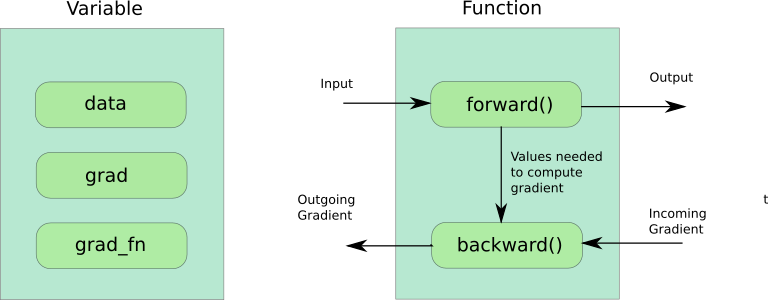

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.


forward() делает 1 проход нейронной сети; содержит все функцие, дающие target - функции между x и y.

Для обучения меняем веса в зависимости от градиента, значит `requires_grad=True`. А для предсказания не меняем веса, не считаем градиент, значит `requires_grad=False`

In [130]:
w = torch.rand(1, requires_grad=True) # 1 вес, т.к. одна переменная (иксом будет 1 признак)
b = torch.rand(1, requires_grad=True) # 1 смещение, т.к. одна переменная

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32) # нормализация произошла
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None # переменные, которым разрешили градиент, пока не участвуют ни в каких функциях
assert b.grad is None # и не было backward, чтобы посчитать градиент

# Не задали функцию и torch не считал градиент <=> его не существует

In [131]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [132]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward() # 1 проход градиентом

In [133]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-12.1852])
dL/db = tensor([-44.2547])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [134]:
w.data, w.grad # вес и градиент

(tensor([0.2177]), tensor([-12.1852]))

In [135]:
w

tensor([0.2177], requires_grad=True)

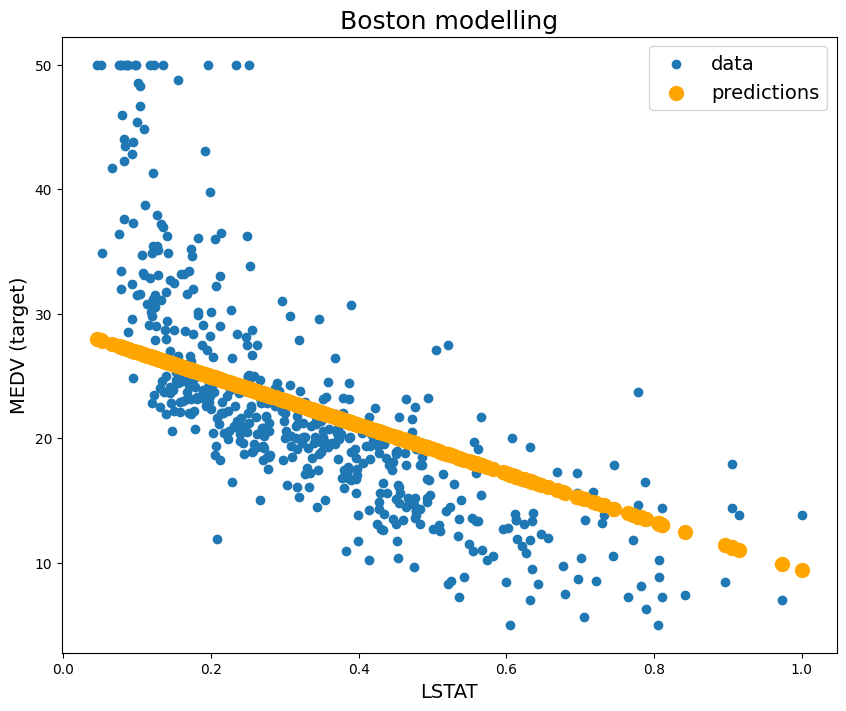

loss =  48.237247


In [136]:
from IPython.display import clear_output

for i in range(300): # хотим сделать 300 шагов GD
    y_pred = w * x + b # тип ищем loc min

    loss = torch.mean((y_pred - y) ** 2) # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss.backward() # 1 раз расчет градиента

    # делаем шаг градиентного спуска с lr = .05 (чтобы избежать переобучения)
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break
# не очень предсказание (выбросы скомпонованы, не учитывает горб слева)

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети (посчитать target)
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [137]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [138]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [139]:
our_dataset = RandomDataset(x, y) # создали датасет

In [140]:
our_dataset.__getitem__(1)

{'sample': tensor([0.6212, 0.2550, 0.8333, 0.9943, 0.5788]),
 'target': 0.5385791937403571}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [141]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [142]:
batch = next(iter(dataloader)) # Итерируемся по всему датасету и можем доставать батчи

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[6.9998e-01, 2.7853e-04, 3.2492e-02, 9.5788e-01, 6.3164e-01],
        [6.2124e-01, 2.5501e-01, 8.3326e-01, 9.9425e-01, 5.7883e-01],
        [7.0777e-02, 1.2623e-01, 1.7118e-02, 5.8634e-01, 7.7886e-01],
        [1.8968e-01, 9.1342e-02, 5.8553e-01, 5.9059e-01, 7.7687e-01]])
Target:
tensor([0.0152, 0.5386, 0.0151, 0.1670], dtype=torch.float64)


**Как сделать нейросеть**

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self): # инициализация функций для использования в forward
        super(Model, self).__init__() # инициализация 1го объекта класса моделей
        self.conv1 = nn.Conv2d(1, 20, 5) # инициализации свертки 1 (размера 2 на 2). 1 вход и 20 выходов
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x): # архитектура сети
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [143]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои (ф-ии последовательно)
model.add_module(
    "l1", nn.Linear(5, 30) # линейное преобразование
)  # добавили 1й слой с 5-ю нейронами на вход и 30 на выход
model.add_module("l2", nn.ReLU()) # добавили 2й слой с функцией активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили 3й слой с 30 нейронами на вход и 1 на выход


another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1)) # альтернативный способ

In [144]:
y_pred = model(batch["sample"])  # получили предсказания модели
y_pred

In [146]:
batch['target'] # плохо работает модель

tensor([0.0152, 0.5386, 0.0151, 0.1670], dtype=torch.float64)

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [147]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=4, shuffle=True, num_workers=1)

val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=4, shuffle=False, num_workers=1)

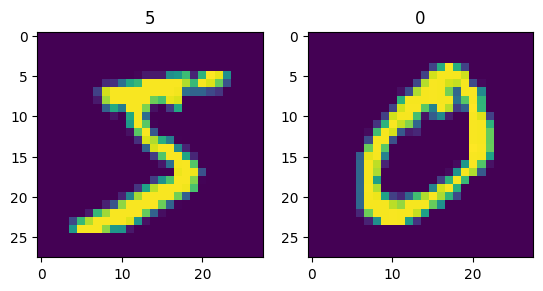

In [148]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [149]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой (FC1), преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(128, 10),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10 (10 классов: 0-9)
)

# создаем оптимизатор(типо ф.потерь), который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

Веса моделей хранятся в виде матриц и выглядят так:

In [150]:
[x for x in model.named_parameters()] # 2 слоя: веса и bias'ы к ним

[('1.weight',
  Parameter containing:
  tensor([[-4.9114e-05, -1.7332e-03, -2.5222e-02,  ...,  1.1823e-02,
            2.1985e-02,  3.8812e-04],
          [-2.4256e-02,  1.7167e-02,  1.2950e-02,  ..., -6.1878e-03,
            1.4140e-02, -1.1669e-02],
          [ 3.0895e-02, -2.4728e-02, -1.6379e-02,  ...,  6.1536e-03,
            1.8673e-02,  1.7091e-03],
          ...,
          [ 6.3073e-03,  1.7558e-02, -2.0548e-02,  ...,  6.3518e-04,
            6.0580e-03,  2.3500e-02],
          [ 1.7490e-02, -1.7545e-02,  2.5953e-04,  ...,  1.1827e-02,
            2.2189e-02, -1.7609e-02],
          [ 2.4634e-02, -1.2854e-03,  2.4783e-02,  ...,  2.7035e-02,
            1.3621e-02, -2.7914e-02]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0093, -0.0205, -0.0007, -0.0084,  0.0107,  0.0025, -0.0090, -0.0064,
          -0.0276,  0.0128, -0.0184, -0.0002,  0.0094,  0.0122,  0.0262, -0.0173,
          -0.0307, -0.0079, -0.0171,  0.0242, -0.0091,  0.0050,  0.0008,  0.0180,


Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [151]:
!pip install wandb --upgrade --quiet

In [152]:
import wandb

In [153]:
# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
#!wandb login()
wandb.login(key='0a24ada4e31a7cb3bf152f76d5a55cb96ce124af')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [154]:
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model); # Есть метрики системные (использование памяти, работа процессора) - сами там появляются;  метрики бизнесовые (ф.п., точность) - мы передаем их туда

mean val accuracy,▁▄█
mean val loss,█▅▁
mean val accuracy,0.9773
mean val loss,0.07713


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS). До сих пор все, что мы делали, было на процессоре.

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```. Если у вас не установлен CUDA-совместимый графический процессор и драйверы CUDA, то после исполнения ячейки ниже в качестве девайса будет выступать CPU.

In [155]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [156]:
device # делаем вычисления на серверах (более мощных). Надо данные загружать на device

device(type='cuda')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства device.

In [157]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.3372, 0.7785],
        [0.8605, 0.3741]], device='cuda:0')

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [158]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [159]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train.to(device))  # делаем предсказания (подаем на вход модели батч, загруженный на девайс. Далее применяем модель нашу: 2 слоя + ReLu)
        loss = F.cross_entropy(y_pred, y_train.to(device))  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети (веса, смещения)
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам <=> выключить подсчет градиентов
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера (датасета)
                y_pred = model(x_val.to(device))  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
                val_loss.append(loss.cpu().numpy())  # добавляем в массив (метрик)
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
                )

        # скидываем метрики на wandb (внешний сервер) и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss), # считаем среднее для списка метрик
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )
# Нейронка не сильно дообучается со следующими итерациями и достигла потолка на первой => 5 эпох слишком много

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10373854637145996, accuracy: 0.9687


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.11220141500234604, accuracy: 0.9645


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.07602092623710632, accuracy: 0.9781


### Дополнительные материалы

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)